# Querying the Genesis database

This example shows how to extract the entire planet population from the hdf5 file

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy.stats

plt.rcParams['axes.formatter.min_exponent'] = 3

## Load the genesis database from an hdf5 file

In [2]:
hf= h5py.File('../genesis_all.hdf5','r')
print(hf.attrs['info'])

Genesis database


List all the run sets

In [3]:
list(hf)

['Gen-HM',
 'Gen-I',
 'Gen-IO',
 'Gen-M-s10',
 'Gen-M-s22',
 'Gen-M-s50',
 'Gen-O',
 'Gen-O-p1',
 'Gen-O-p2',
 'Gen-O-s10',
 'Gen-O-s22',
 'Gen-O-s5',
 'Gen-P',
 'Gen-P-I',
 'Gen-P-IO']

## Read in and visualize the data

Define a function to extract all the planetary systems from a run set,  
and store this population in a dictionary dor easy plotting/analysis

In [4]:
def population_from_hdf5(hfset):
    
    # lists for storing planet porperties
    L_mass= []
    L_sma= []
    L_starID= []
    L_inc= []
    
    for runID, run in hfset.items():    
    
        ID= run['snapshots']['id'][()] # [()] is to extract to numpy arrays
        sma= run['snapshots']['sma'][()] 
        mass= run['snapshots']['mass'][()] 
        time= run['snapshots']['t'][()]
        inc= run['snapshots']['inc'][()]
        
        tgrid= np.unique(time)
        t1= time == tgrid[-1]
            
        # loop over each planet and add properties to big list
        for planet in run['planets'].values():
            
            # index to planet in the snapshots
            ip= ID == planet['id'][()] 
            
            L_mass.append(mass[ip&t1][0])
            L_sma.append(sma[ip&t1][0]) 
            L_inc.append(inc[ip&t1][0]*(np.pi/180))
            L_starID.append(runID) # identifier for each system
        
    starID= np.array(L_starID)
    sma= np.array(L_sma)
    mass= np.array(L_mass)
    inc= np.array(L_inc)
    
    # sort planetary systems inside out
    order= np.lexsort((sma,starID)) 
    
    return dict(starID=starID[order], sma= sma[order], mass=mass[order], inc=inc[order])

Generate the planet population for each run set

In [5]:
pops= {}
for name in list(hf):
    pops[name]= population_from_hdf5(hf[name])

Plot the mass and semi-major axis of the planet population of each run set

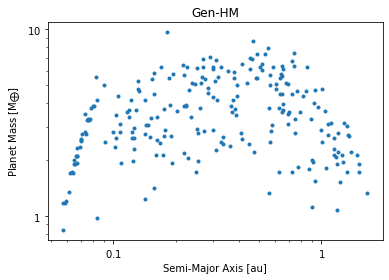

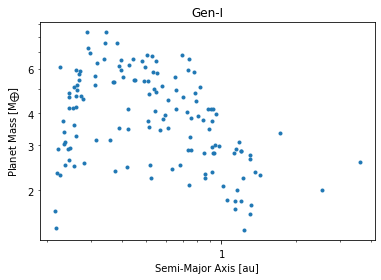

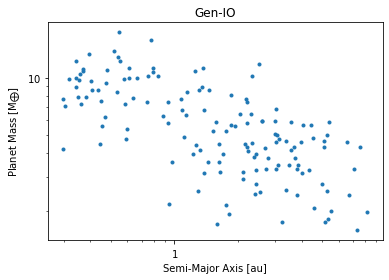

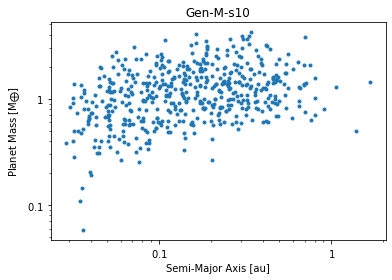

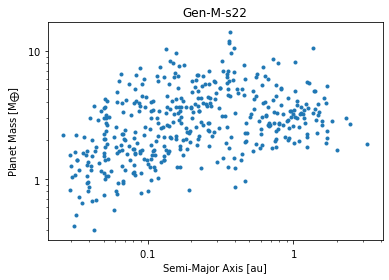

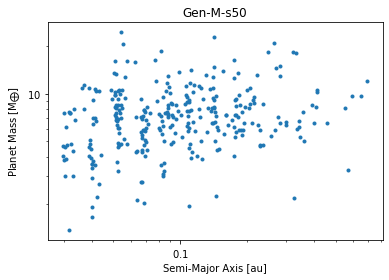

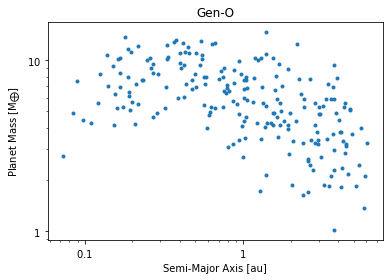

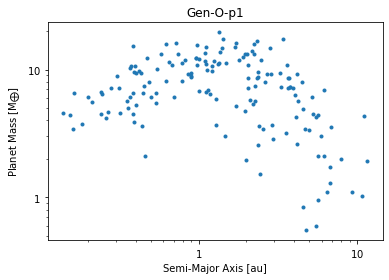

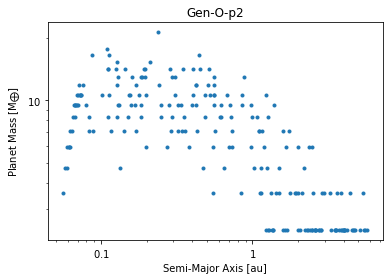

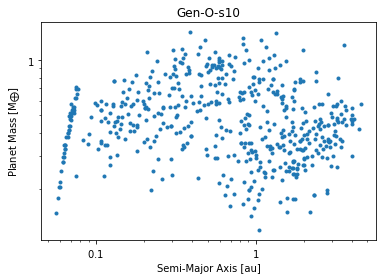

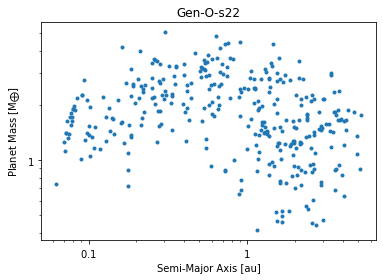

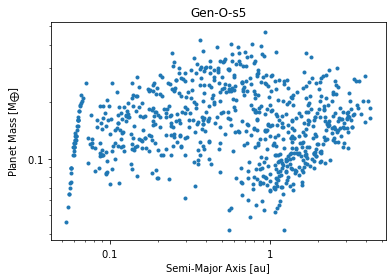

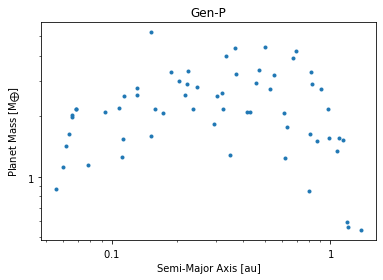

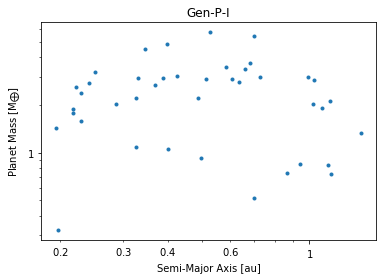

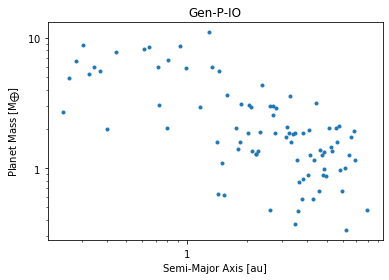

In [6]:
for name in list(hf):
    pop= pops[name]
    plt.title(name)
    plt.xlabel('Semi-Major Axis [au]')
    plt.ylabel('Planet Mass [M$_\\bigoplus$]')


    plt.loglog(pop['sma'], pop['mass'], '.')
    plt.show()

## Goodbye

In [7]:
hf.close()